In [559]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')

#Print Shape, Column Names, Dataframe Head, 
print('Features Data', '\n--------------------', '\nShape:', features.shape, "\nColumns:",features.columns.tolist(), '\n', features.head(), '\n====================')
print('Sales Data', '\n--------------------', '\nShape:', sales.shape, "\nColumns:",sales.columns.tolist(), '\n', sales.head(), '\n====================')
print('Stores Data', '\n--------------------', '\nShape:', stores.shape, "\nColumns:",stores.columns.tolist(), '\n', stores.head())

Features Data 
-------------------- 
Shape: (8190, 12) 
Columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'] 
    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106  

In [560]:
#Convert dates into python date time object
features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])


In [561]:
#Merge dataframes using pd.merge 
df=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='left')
dfmerged=pd.merge(df,stores, on=['Store'], how='left')

dfmerged.head()

print('dfmerged Data', '\n--------------------', '\nShape:', dfmerged.shape, "\nColumns:",dfmerged.columns.values, '\n', dfmerged.head())

dfmerged Data 
-------------------- 
Shape: (421570, 16) 
Columns: ['Store' 'Dept' 'Date' 'Weekly_Sales' 'IsHoliday' 'Temperature'
 'Fuel_Price' 'MarkDown1' 'MarkDown2' 'MarkDown3' 'MarkDown4' 'MarkDown5'
 'CPI' 'Unemployment' 'Type' 'Size'] 
    Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-05-02      24924.50      False        42.31       2.572   
1      1     1 2010-12-02      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-05-03      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289

In [562]:
#Print Datatypes
print(dfmerged.dtypes)

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object


In [563]:
#Review the column names, null value counts and data types of dfmerged using .info()
print(dfmerged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [564]:
#Print the range of column values using .agg() and use .T to transpose for readability
print(dfmerged.agg([min, max]).T)

                              min                  max
Store                           1                   45
Dept                            1                   99
Date          2010-01-10 00:00:00  2012-12-10 00:00:00
Weekly_Sales             -4988.94               693099
IsHoliday                   False                 True
Temperature                 -2.06               100.14
Fuel_Price                  2.472                4.468
MarkDown1                    0.27              88646.8
MarkDown2                 -265.76               104520
MarkDown3                   -29.1               141631
MarkDown4                    0.22              67474.9
MarkDown5                  135.16               108519
CPI                       126.064              227.233
Unemployment                3.879               14.313
Type                            A                    C
Size                        34875               219622


In [565]:
#Review Summary Statistics
print(dfmerged.describe())

               Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  150681.000000  111248.000000  137091.000000   
mean        3.361027    7246.420196    3334.628621    1439.421384   
std         0.458515    8291.221345    9475.357325    9623.078290   
min         2.472000       0.270000    -265.760000     -29.100000   
25%         2.933000    2240.2700

In [566]:
# print out the percent of each feature that is missing
nas = pd.DataFrame(dfmerged.isnull().sum().sort_values(ascending=False)/len(dfmerged),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
MarkDown2,0.736110
MarkDown4,0.679847
MarkDown3,0.674808
MarkDown1,0.642572
MarkDown5,0.640790


In [567]:
#Fill missing values values with 0 using fillna and check percent of each feature that is missing using the code from above 

from numpy import nan
dfmerged.replace({'MarkDown1': {nan: 0}, 'MarkDown2': {nan: 0}, 'MarkDown3': {nan: 0}, 'MarkDown4': {nan: 0}, 'MarkDown5': {nan: 0}}, inplace=True)

# print out the percent of each feature that is missing, it can be seen that there are no missing values
nas=pd.DataFrame(dfmerged.isnull().sum().sort_values(ascending=False)/len(dfmerged),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


In [568]:
print(dfmerged.dtypes)

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object


In [569]:
#Check for duplicate rows, it can be seen there are no duplicate rows
duplicateRowsDF = dfmerged[dfmerged.duplicated()]
duplicateRowsDF

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size


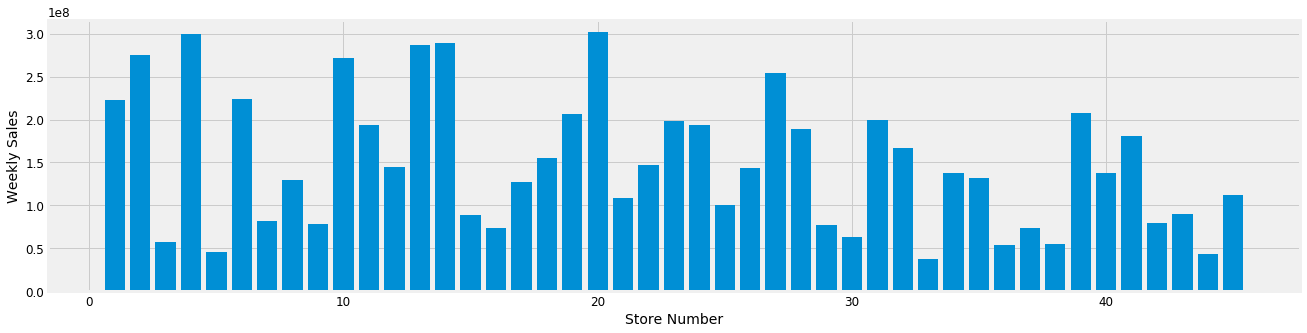

In [570]:
weekly_sales = dfmerged.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
plt.figure(figsize=(20,5)) 
plt.bar(weekly_sales.Store, weekly_sales.Weekly_Sales)
plt.xlabel('Store Number')
plt.ylabel('Weekly Sales')
plt.show()

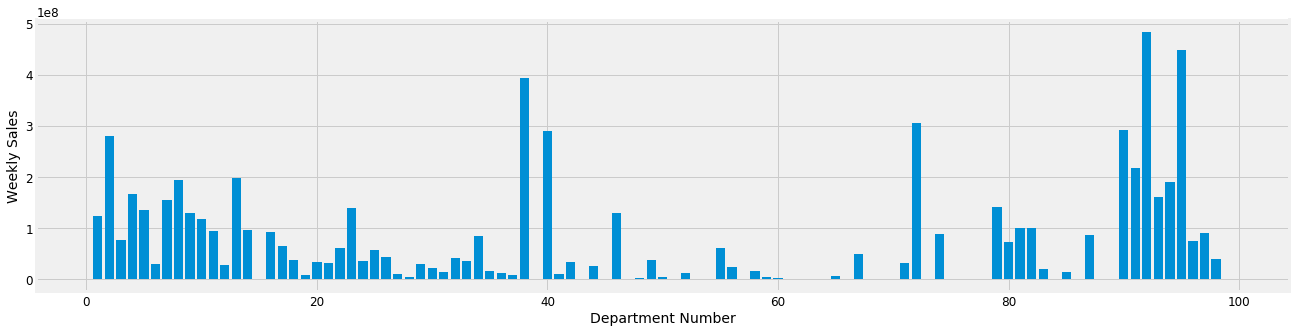

In [571]:
weekly_sales_dept = dfmerged.groupby(by=['Dept'], as_index=False)['Weekly_Sales'].sum()
plt.figure(figsize=(20,5))
plt.bar(weekly_sales_dept.Dept, weekly_sales_dept.Weekly_Sales)
plt.xlabel('Department Number')
plt.ylabel('Weekly Sales')
plt.show()

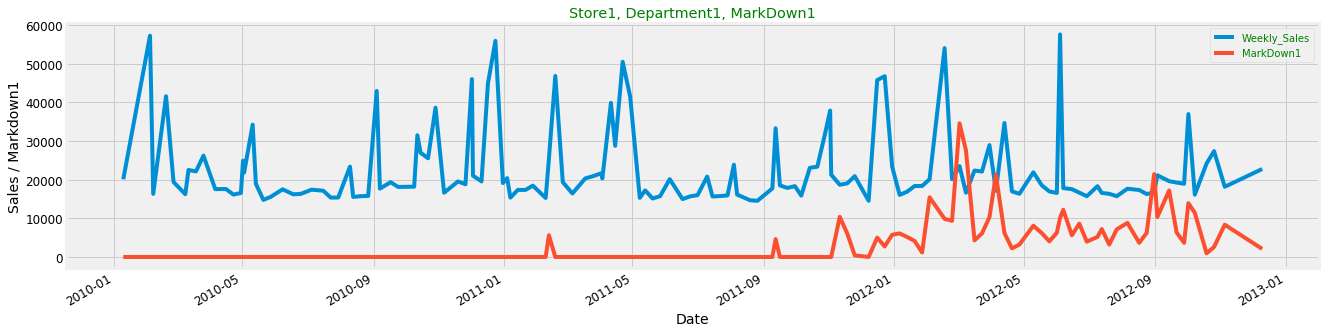

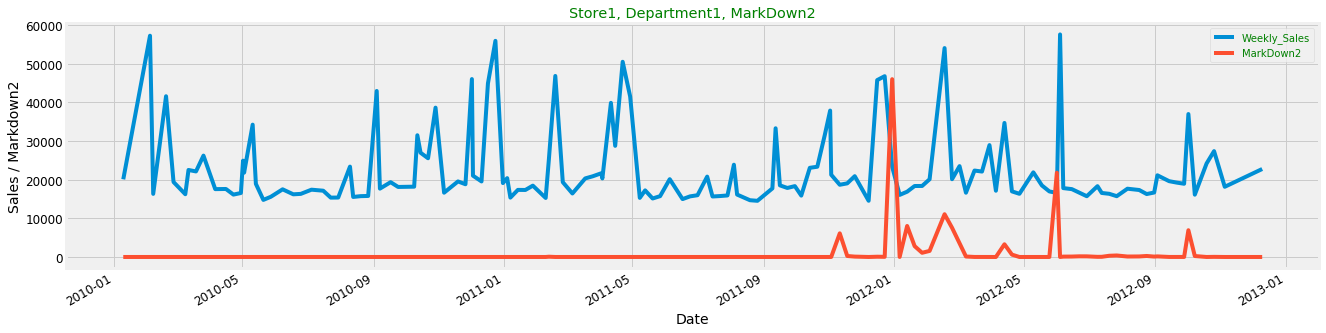

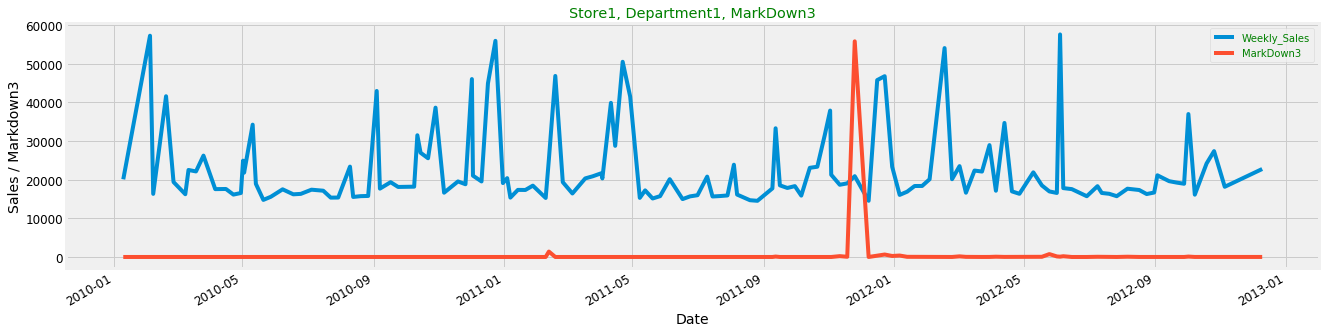

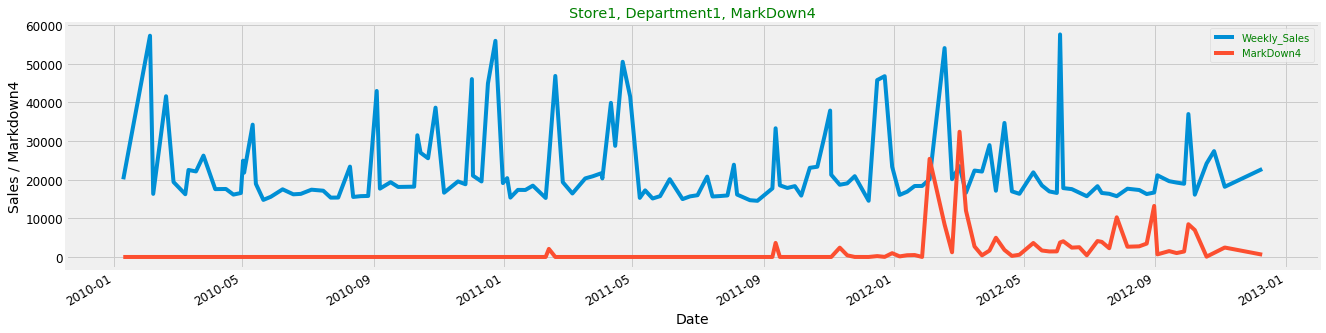

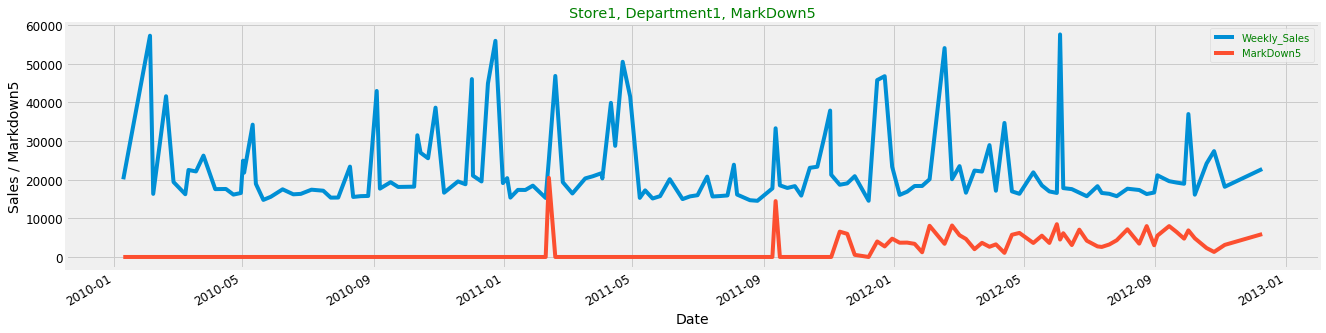

In [572]:

store = dfmerged.groupby('Store')
store1 = store.get_group(1)
store1_dept = store1.groupby('Dept')
store1_dept1 = store1_dept.get_group(1)
store1_dept1_md1 = store1_dept1[['Date', 'Weekly_Sales', 'MarkDown1']]
store1_dept1_md1 = store1_dept1_md1.set_index('Date')

store1_dept1_md1.plot(figsize=(20, 5))
plt.title('Store1, Department1, MarkDown1')
plt.ylabel('Sales / Markdown1')
plt.show()


store = dfmerged.groupby('Store')
store1 = store.get_group(1)
store1_dept = store1.groupby('Dept')
store1_dept1 = store1_dept.get_group(1)
store1_dept1_md2 = store1_dept1[['Date', 'Weekly_Sales', 'MarkDown2']]
store1_dept1_md2 = store1_dept1_md2.set_index('Date')

store1_dept1_md2.plot(figsize=(20, 5))
plt.title('Store1, Department1, MarkDown2')
plt.ylabel('Sales / Markdown2')
plt.show()


store = dfmerged.groupby('Store')
store1 = store.get_group(1)
store1_dept = store1.groupby('Dept')
store1_dept1 = store1_dept.get_group(1)
store1_dept1_md3 = store1_dept1[['Date', 'Weekly_Sales', 'MarkDown3']]
store1_dept1_md3 = store1_dept1_md3.set_index('Date')

store1_dept1_md3.plot(figsize=(20, 5))
plt.title('Store1, Department1, MarkDown3')
plt.ylabel('Sales / Markdown3')
plt.show()


store = dfmerged.groupby('Store')
store1 = store.get_group(1)
store1_dept = store1.groupby('Dept')
store1_dept1 = store1_dept.get_group(1)
store1_dept1_md4 = store1_dept1[['Date', 'Weekly_Sales', 'MarkDown4']]
store1_dept1_md4 = store1_dept1_md4.set_index('Date')

store1_dept1_md4.plot(figsize=(20, 5))
plt.title('Store1, Department1, MarkDown4')
plt.ylabel('Sales / Markdown4')
plt.show()


store = dfmerged.groupby('Store')
store1 = store.get_group(1)
store1_dept = store1.groupby('Dept')
store1_dept1 = store1_dept.get_group(1)
store1_dept1_md5 = store1_dept1[['Date', 'Weekly_Sales', 'MarkDown5']]
store1_dept1_md5 = store1_dept1_md5.set_index('Date')

store1_dept1_md5.plot(figsize=(20, 5))
plt.title('Store1, Department1, MarkDown5')
plt.ylabel('Sales / Markdown5')
plt.show()

    

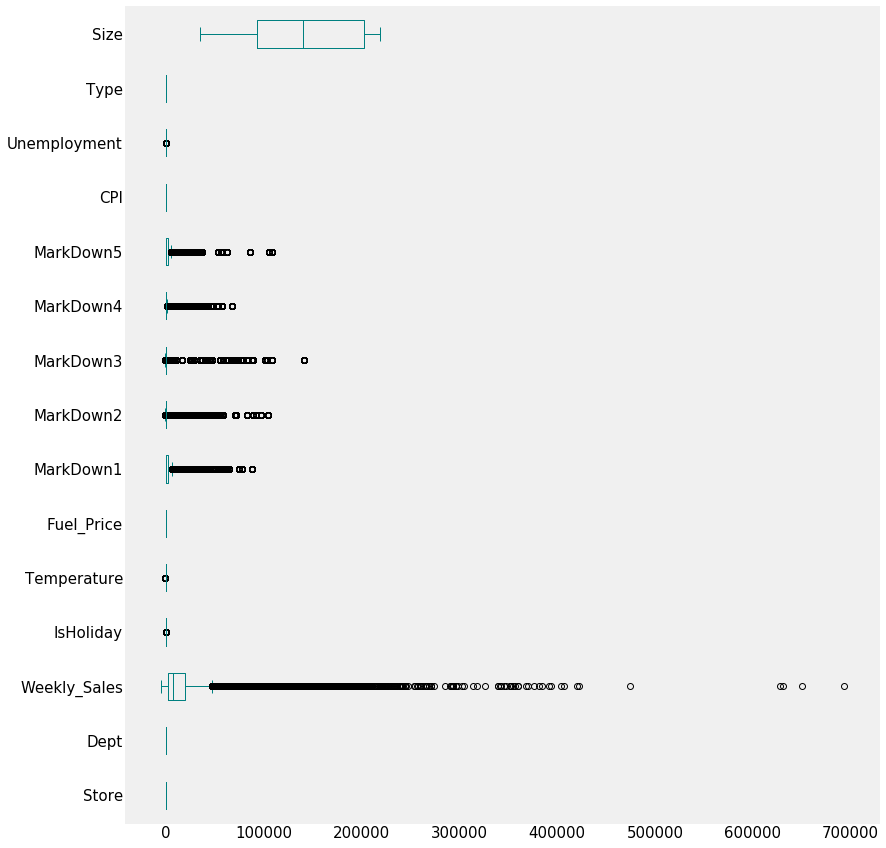

In [573]:
#Visualize data in boxplots to look for outliers and replace store type 'A, B, C' with '1, 2, 3' respectively
dfmerged['Type'].astype('str')
mapping = {'A': 1, 'B': 2, 'C': 3}
dfmerged.replace({'Type': mapping}, inplace=True)
boxplot = dfmerged.boxplot(grid=False, vert=False, fontsize=15, color='teal', figsize=(12,15))

In [574]:
#Calculate the correlation coefficients
corr = dfmerged.corr()

#plot retail data in Pearsons correlation heat map 
corr.round(2).style.background_gradient(cmap='Wistia')

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Store,1.000000,0.020000,-0.090000,-0.000000,-0.050000,0.070000,-0.060000,-0.030000,-0.020000,-0.040000,-0.010000,-0.210000,0.210000,0.230000,-0.180000
Dept,0.020000,1.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,0.010000,0.000000,-0.000000
Weekly_Sales,-0.090000,0.150000,1.000000,0.010000,-0.000000,-0.000000,0.050000,0.020000,0.040000,0.040000,0.050000,-0.020000,-0.030000,-0.180000,0.240000
IsHoliday,-0.000000,0.000000,0.010000,1.000000,-0.160000,-0.080000,-0.000000,0.210000,0.270000,0.010000,-0.020000,-0.000000,0.010000,-0.000000,0.000000
Temperature,-0.050000,0.000000,-0.000000,-0.160000,1.000000,0.140000,-0.030000,-0.180000,-0.060000,-0.050000,-0.010000,0.180000,0.100000,0.040000,-0.060000
Fuel_Price,0.070000,0.000000,-0.000000,-0.080000,0.140000,1.000000,0.300000,0.030000,0.020000,0.170000,0.220000,-0.160000,-0.030000,0.030000,0.000000
MarkDown1,-0.060000,0.000000,0.050000,-0.000000,-0.030000,0.300000,1.000000,0.170000,-0.010000,0.840000,0.420000,0.010000,-0.110000,-0.130000,0.170000
MarkDown2,-0.030000,0.000000,0.020000,0.210000,-0.180000,0.030000,0.170000,1.000000,-0.010000,0.110000,0.130000,-0.000000,-0.040000,-0.060000,0.080000
MarkDown3,-0.020000,0.000000,0.040000,0.270000,-0.060000,0.020000,-0.010000,-0.010000,1.000000,-0.010000,0.040000,-0.010000,-0.020000,-0.020000,0.030000
MarkDown4,-0.040000,0.000000,0.040000,0.010000,-0.050000,0.170000,0.840000,0.110000,-0.010000,1.000000,0.300000,-0.000000,-0.080000,-0.090000,0.130000


In [575]:
#More insights about the unique values of the data and unique values of the stores and departments
#Print unique values 
print(dfmerged.nunique(), '\n====================')
print('Store Numbers:', '\n--------------------', dfmerged.Store.unique(), '\n====================')
print('Department Numbers:', '\n--------------------', dfmerged.Dept.unique())

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
Temperature       3528
Fuel_Price         892
MarkDown1         2278
MarkDown2         1499
MarkDown3         1662
MarkDown4         1945
MarkDown5         2294
CPI               2145
Unemployment       349
Type                 3
Size                40
dtype: int64 
Store Numbers: 
-------------------- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] 
Department Numbers: 
-------------------- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


In [576]:
#View of top and least perfoming stores and departments
store_performance = dfmerged.groupby(by=['Store', 'Type', 'Dept', 'Date'], as_index=False)['Weekly_Sales'].sum()
print('Top Performing Stores by Department and Date', '\n----------------------------------------------')
print(store_performance.sort_values('Weekly_Sales', ascending=False)[:20], '\n==================================================')
print('Least Performing Stores by Department and Date', '\n----------------------------------------------')
print(store_performance.sort_values('Weekly_Sales')[:20])

Top Performing Stores by Department and Date 
----------------------------------------------
        Store  Type  Dept       Date  Weekly_Sales
95372      10     2    72 2010-11-26     693099.36
338014     35     2    72 2011-11-25     649770.18
95426      10     2    72 2011-11-25     630999.19
337960     35     2    72 2010-11-26     627962.93
135664     14     1    72 2010-11-26     474330.10
195087     20     1    72 2010-11-26     422306.25
264389     27     1    72 2010-11-26     420586.57
88428      10     2     7 2010-12-24     406988.63
95377      10     2    72 2010-12-24     404245.03
214431     22     2    72 2010-11-26     393705.20
195141     20     1    72 2011-11-25     392023.02
37254       4     1    72 2011-11-25     385051.04
37200       4     1    72 2010-11-26     381072.11
135718     14     1    72 2011-11-25     375948.31
224410     23     2    72 2010-11-26     369830.98
264443     27     1    72 2011-11-25     368484.19
115275     12     2    72 2011-11-25    

In [577]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

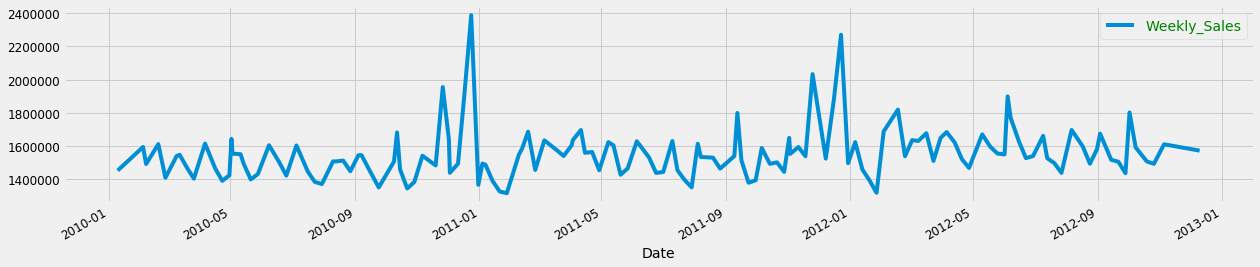

In [578]:
df1=dfmerged.where(dfmerged['Store'] == 1)
df1=df1.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df1 = df1.set_index('Date')
df1.plot(figsize=(19, 4))
plt.show()

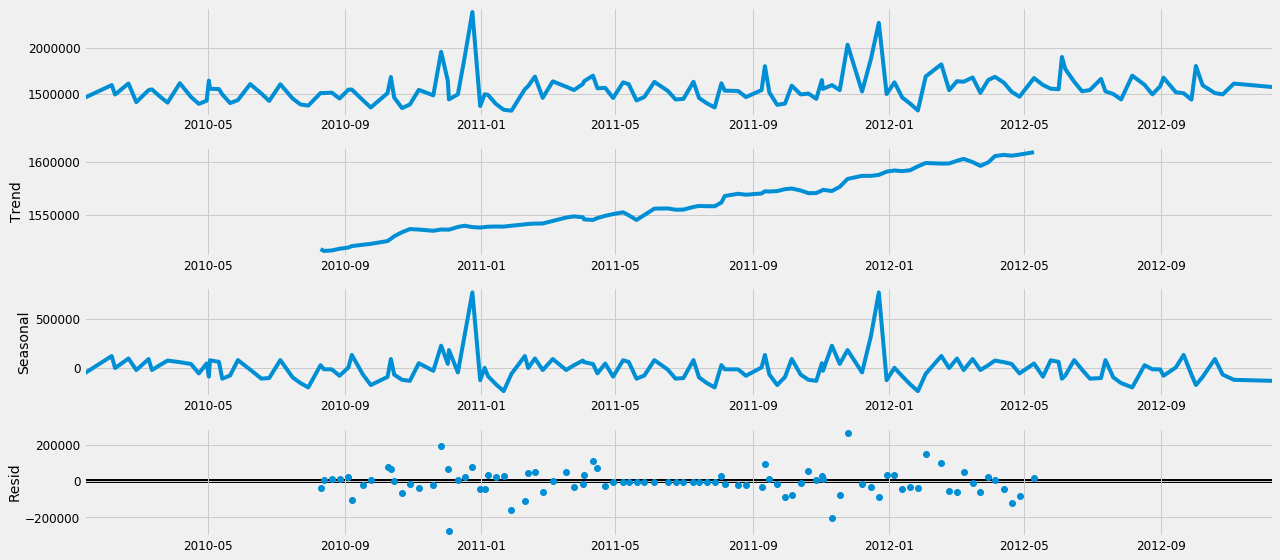

In [579]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df1, model='additive', freq=52)
fig = decomposition.plot()
plt.show()

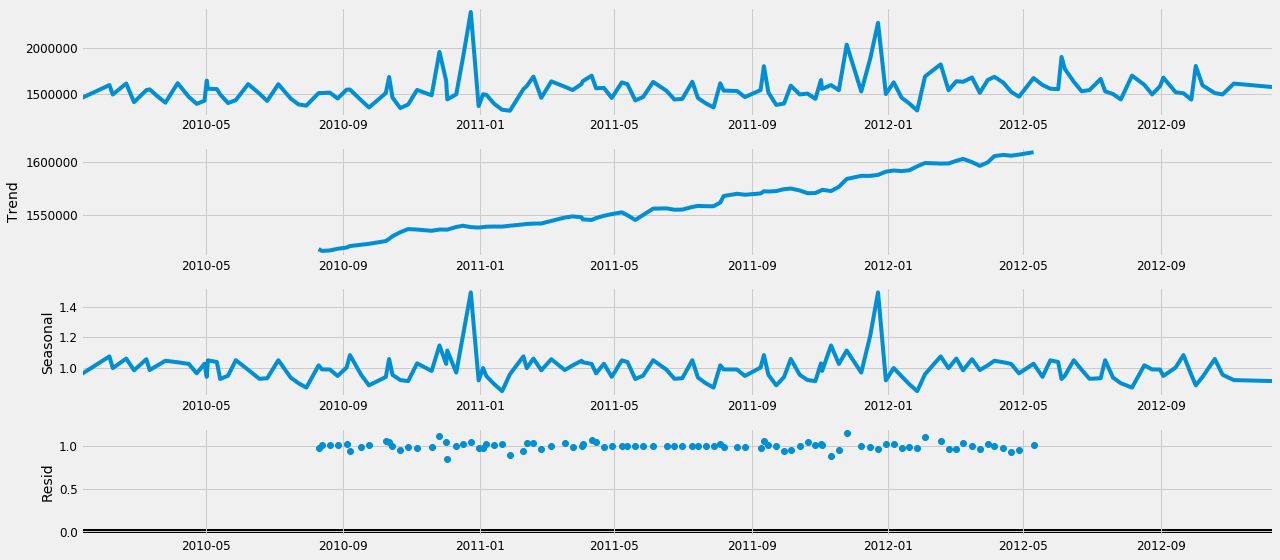

In [580]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df1, model='multiplactive', freq=52)
fig = decomposition.plot()
plt.show()

In [581]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [582]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df1, order=param,seasonal_order=param_seasonal, enforce_stationarity=True, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)52 - AIC:4486.784293189608
ARIMA(0, 0, 0)x(0, 0, 1, 12)52 - AIC:4409.623979611544
ARIMA(0, 0, 0)x(0, 1, 0, 12)52 - AIC:3592.835826127226
ARIMA(0, 0, 0)x(0, 1, 1, 12)52 - AIC:3600.1154679753126
ARIMA(0, 0, 0)x(1, 0, 0, 12)52 - AIC:3969.6171474117914
ARIMA(0, 0, 0)x(1, 0, 1, 12)52 - AIC:3919.948532717466
ARIMA(0, 0, 0)x(1, 1, 0, 12)52 - AIC:3590.646886404137
ARIMA(0, 0, 0)x(1, 1, 1, 12)52 - AIC:3603.9217873473217
ARIMA(0, 0, 1)x(0, 0, 0, 12)52 - AIC:4388.258772566155
ARIMA(0, 0, 1)x(0, 0, 1, 12)52 - AIC:4374.635928167431
ARIMA(0, 0, 1)x(0, 1, 0, 12)52 - AIC:3591.135119060419
ARIMA(0, 0, 1)x(0, 1, 1, 12)52 - AIC:3585.153900760196
ARIMA(0, 0, 1)x(1, 0, 0, 12)52 - AIC:4364.911134004087
ARIMA(0, 0, 1)x(1, 0, 1, 12)52 - AIC:4365.315117335271
ARIMA(0, 0, 1)x(1, 1, 0, 12)52 - AIC:3585.406211603382
ARIMA(0, 0, 1)x(1, 1, 1, 12)52 - AIC:3587.153651194092
ARIMA(0, 1, 0)x(0, 0, 0, 12)52 - AIC:3865.953146331153
ARIMA(0, 1, 0)x(0, 0, 1, 12)52 - AIC:3870.454073328058
ARIMA(0

In [583]:
# SARIMAX(1, 1, 1)x(1, 1, 1, 12)52 is the best parameter combination with the lowest AIC: 3566.398.
mod = sm.tsa.statespace.SARIMAX(df1, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1098      0.153      0.719      0.472      -0.189       0.409
ma.L1         -0.7781      0.107     -7.292      0.000      -0.987      -0.569
ar.S.L12      -0.2035      0.211     -0.965      0.335      -0.617       0.210
ma.S.L12      -0.3546      0.189     -1.873      0.061      -0.726       0.016
sigma2      5.584e+10    1.8e-12    3.1e+22      0.000    5.58e+10    5.58e+10


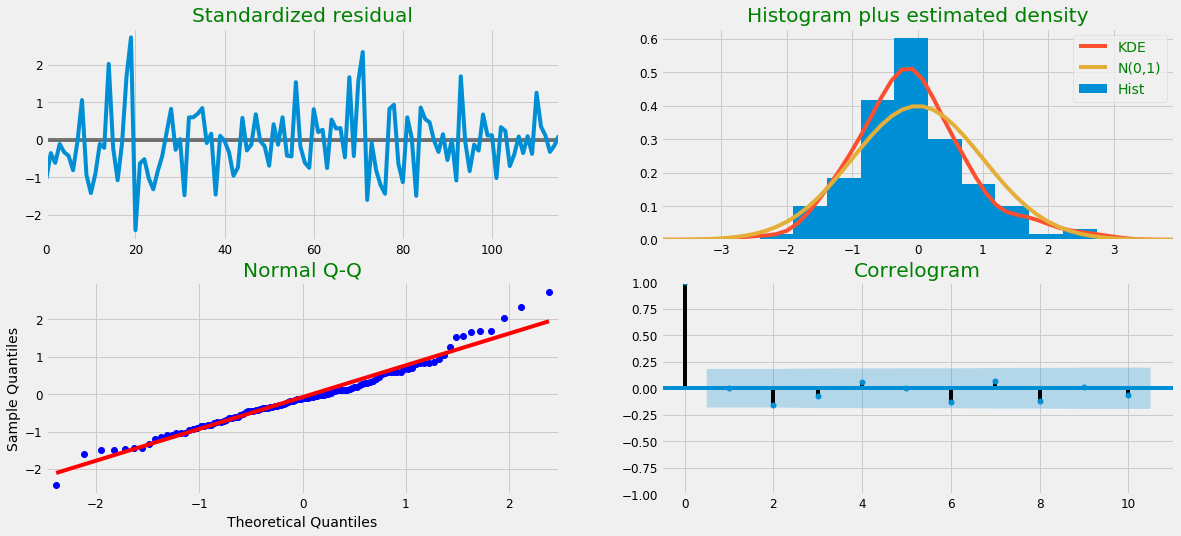

In [584]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

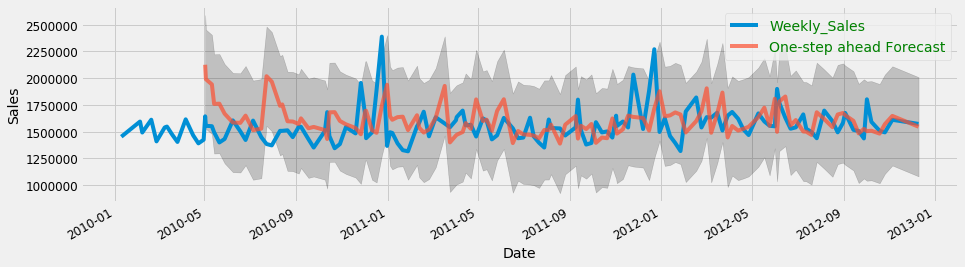

In [585]:
pred = results.get_prediction(start=pd.to_datetime('2010-05-02'), dynamic=False)
pred_ci = pred.conf_int()
ax = df1['2009':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [586]:
print(df1)

            Weekly_Sales
Date                    
2010-01-10    1453329.50
2010-02-04    1594968.28
2010-02-07    1492418.14
2010-02-19    1611968.17
2010-02-26    1409727.59
...                  ...
2012-10-08    1592409.97
2012-10-19    1508068.77
2012-10-26    1493659.74
2012-11-05    1611096.05
2012-12-10    1573072.81

[143 rows x 1 columns]


In [587]:
df1_forecasted = pred.predicted_mean
df1_truth = df1['Weekly_Sales']
mse = ((df1_forecasted - df1_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 49526016666.85
The Root Mean Squared Error is 222544.42


In [588]:
#print(df1)
#nas = pd.DataFrame(df1.isnull().sum().sort_values(ascending=False)/len(df1),columns = ['percent'])
#pos = nas['percent'] > 0
#print(df1.info())

In [592]:
df1 = df1.reset_index()
print(df1)

df1['week'] = df1.Date.dt.week
df1['year'] = df1.Date.dt.year
df1['month'] = df1.Date.dt.month

df1['Date'] = pd.to_datetime(df1[['week','month','year']].astype(str).apply(' '.join, 1), format='%j %m %Y')

     index       Date  Weekly_Sales  week  year  month
0        0 2010-01-01    1453329.50     1  2010      1
1        1 2010-01-05    1594968.28     5  2010      2
2        2 2010-01-05    1492418.14     5  2010      2
3        3 2010-01-07    1611968.17     7  2010      2
4        4 2010-01-08    1409727.59     8  2010      2
..     ...        ...           ...   ...   ...    ...
138    138 2012-02-10    1592409.97    41  2012     10
139    139 2012-02-11    1508068.77    42  2012     10
140    140 2012-02-12    1493659.74    43  2012     10
141    141 2012-02-14    1611096.05    45  2012     11
142    142 2012-02-19    1573072.81    50  2012     12

[143 rows x 6 columns]


In [593]:
#pd.Series(df1.index).dt.round("6D")  ---Does not work
#converted = df1.asfreq('52W', method='pad') ---Does not work
#df1.sort_index(axis = 0)   ---Does not work
#df1 = pd.DatetimeIndex(df1.index, freq ='W')
#pd.DatetimeIndex(df1["Date"].asfreq(freq='W'))
#df1.reset_index(inplace=True)
#print(df1)

#df1 = pd.to_datetime(df1.index())
#df1 = pd.date_range(df1.index(), periods=52, freq='W')

pred_uc = results.get_forecast(steps=52)
pred_ci = pred_uc.conf_int()
ax = df1.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', figsize=(20, 5))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

ValueError: view limit minimum -510442.4860811387 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x360 with 1 Axes>

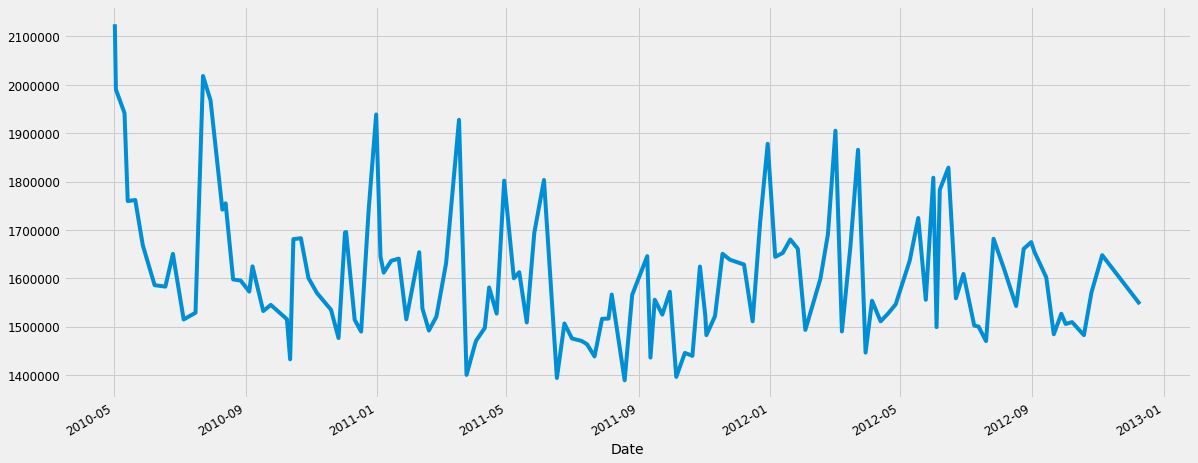

In [594]:
df1_forecasted = pred.predicted_mean
df1_forecasted.head(12)
df1_forecasted.plot()


In [595]:
df1_truth.head(12)

Date
2010-01-10    1453329.50
2010-02-04    1594968.28
2010-02-07    1492418.14
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-09    1540163.53
2010-03-12    1548033.78
2010-03-19    1472515.79
2010-03-26    1404429.92
2010-04-06    1615524.71
2010-04-16    1466058.28
2010-04-23    1391256.12
Name: Weekly_Sales, dtype: float64

In [596]:
pred_ci.head(24)

,lower Weekly_Sales,upper Weekly_Sales
143,1.085316e+06,2.011591e+06
144,1.194968e+06,2.170875e+06
145,1.194790e+06,2.199603e+06
146,1.059327e+06,2.090534e+06
147,9.890745e+05,2.045839e+06
148,9.589462e+05,2.040644e+06
149,1.136328e+06,2.242395e+06
150,9.682494e+05,2.098160e+06
151,9.015278e+05,2.054789e+06
152,9.029323e+05,2.079081e+06


In [597]:
forecast = pred_uc.predicted_mean
forecast.head(12)

143    1.548453e+06
144    1.682921e+06
145    1.697197e+06
146    1.574931e+06
147    1.517457e+06
148    1.499795e+06
149    1.689361e+06
150    1.533205e+06
151    1.478158e+06
152    1.491007e+06
153    1.632848e+06
154    1.562360e+06
dtype: float64